# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Opening the CSV File

In [5]:
df = pd.read_csv('C:\\Users\\Sorbajit Goswami\\Downloads\\train.csv')
df.head(10)

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,A,I,A,B,B,BI,A,S,Q,...,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1,A,I,A,A,E,BI,K,W,AD,...,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,2,A,K,A,A,E,BI,A,E,BM,...,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,3,A,K,A,C,E,BI,A,Y,AD,...,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,4,A,I,G,B,E,BI,C,G,Q,...,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1
5,7,A,I,C,A,E,BI,C,AV,Y,...,0.524760,0.580085,0.301498,0.261055,0.193988,0.935688,0.685868,0.277694,0.428115,0
6,10,A,A,G,A,H,BI,A,S,AD,...,0.678466,0.747125,0.678212,0.553609,0.281719,0.768782,0.688580,0.320699,0.642256,0
7,12,A,F,A,A,I,BI,C,AF,AG,...,0.943545,0.209744,0.670577,0.772650,0.845751,0.507320,0.927204,0.605755,0.454155,1
8,13,B,I,A,A,E,BI,C,AK,AE,...,0.635195,0.672264,0.561127,0.419873,0.508550,0.673267,0.356103,0.471519,0.499554,0
9,14,A,L,A,B,E,BI,C,AF,AX,...,0.397622,0.506096,0.200673,0.734145,0.521673,0.365571,0.416094,0.584799,0.447149,1


In [6]:
df.describe()

,id,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,250183.425697,0.504749,0.494073,0.516632,0.474235,0.504848,0.502257,0.488229,0.501739,0.488074,0.469496,0.508230,0.264870
std,144320.334812,0.206788,0.213037,0.214851,0.216636,0.227474,0.241243,0.211335,0.203496,0.179048,0.194516,0.203393,0.441265
min,0.000000,-0.049562,0.084480,0.094493,-0.045316,0.168071,-0.036379,0.005199,0.090901,0.024139,0.214866,0.097789,0.000000
25%,125399.750000,0.344985,0.317363,0.326047,0.292249,0.279303,0.276442,0.323914,0.353054,0.358915,0.309934,0.368312,0.000000
50%,250192.500000,0.479650,0.463170,0.471247,0.387564,0.479858,0.554768,0.518089,0.435404,0.410908,0.407477,0.446576,0.000000
75%,375246.250000,0.637657,0.693992,0.704625,0.644950,0.725779,0.735225,0.608537,0.642023,0.612725,0.586793,0.581957,1.000000
max,499999.000000,1.004559,1.009958,1.016600,0.952187,0.858578,0.853022,0.966553,1.035818,1.055885,1.005652,1.011331,1.000000


In [7]:
df.isnull().sum()

id        0
cat0      0
cat1      0
cat2      0
cat3      0
cat4      0
cat5      0
cat6      0
cat7      0
cat8      0
cat9      0
cat10     0
cat11     0
cat12     0
cat13     0
cat14     0
cat15     0
cat16     0
cat17     0
cat18     0
cont0     0
cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
target    0
dtype: int64

# Data Slicing and Taking for Calculation

In [86]:
y = df['target']
x = df.iloc[:,20:31]

In [14]:
x

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
0,0.629858,0.855349,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915
1,0.370727,0.328929,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729
2,0.502272,0.322749,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452
3,0.934242,0.707663,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242
4,0.254427,0.274514,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960
...,...,...,...,...,...,...,...,...,...,...,...
299995,0.681700,0.500730,0.662428,0.671927,0.390566,0.145840,0.262767,0.514248,0.519340,0.617436,0.688007
299996,0.489226,0.790664,0.821657,0.620356,0.384891,0.735879,0.547731,0.726653,0.470575,0.275743,0.638939
299997,0.487882,0.522347,0.407037,0.232436,0.832482,0.810663,0.596939,0.308821,0.373997,0.518024,0.452144
299998,0.331900,0.812891,0.808045,0.630708,0.346898,0.735147,0.563488,0.609836,0.680430,0.318453,0.335822


In [15]:
y

0         0
1         0
2         0
3         0
4         1
         ..
299995    0
299996    0
299997    1
299998    0
299999    0
Name: target, Length: 300000, dtype: int64

# Data Training and Testing

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [64]:
X_train

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
79000,0.341221,0.951127,0.957749,0.269320,0.672540,0.556228,0.948626,0.244555,0.288494,0.271757,0.305949
222163,0.159984,0.305710,0.366134,0.081631,0.815520,0.358488,0.341593,0.320208,0.344779,0.243947,0.278754
147313,0.196597,0.215934,0.287165,0.582342,0.342835,0.555540,0.542874,0.360633,0.354576,0.719910,0.282435
201668,0.534855,0.767218,0.586262,0.048410,0.718854,0.679594,0.769685,0.352395,0.630518,0.294383,0.410805
143237,0.376221,0.619263,0.568065,0.694956,0.291197,0.737408,0.502597,0.748084,0.448312,0.324505,0.400859
...,...,...,...,...,...,...,...,...,...,...,...
211543,0.927697,0.534456,0.754418,0.854946,0.308862,0.158290,0.176899,0.957418,0.649101,0.226340,0.878528
86293,0.251539,0.182565,0.289757,0.301147,0.364272,0.736122,0.528540,0.240332,0.423502,0.510280,0.331631
122579,0.330361,0.379607,0.275187,0.604972,0.810456,0.736583,0.595758,0.451117,0.328824,0.423931,0.290924
152315,0.872170,0.722915,0.775491,0.787974,0.798268,0.140254,0.230232,0.825961,0.532919,0.824804,0.827295


In [65]:
y_train

79000     1
222163    1
147313    0
201668    0
143237    0
         ..
211543    0
86293     0
122579    0
152315    0
117952    0
Name: target, Length: 210000, dtype: int64

In [66]:
X_test

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
112692,0.670207,0.475965,0.423490,0.308699,0.254369,0.071346,0.329239,0.403801,0.393791,0.514018,0.472460
19498,0.624572,0.630822,0.834183,0.594514,0.680378,0.680145,0.544423,0.429044,0.431622,0.587635,0.645455
31689,0.364256,0.248830,0.288109,0.348481,0.345248,0.487943,0.523171,0.381740,0.362363,0.332319,0.401591
231780,0.475850,0.416180,0.441526,0.305673,0.291230,0.357305,0.944479,0.344833,0.390079,0.278145,0.409582
4298,0.972405,0.712700,0.755549,0.849230,0.829192,0.619486,0.137037,0.969388,0.545495,0.500671,0.947421
...,...,...,...,...,...,...,...,...,...,...,...
289193,0.488562,0.338524,0.339435,0.149197,0.231020,0.813114,0.547923,0.349850,0.343319,0.582875,0.442776
159362,0.959685,0.485126,0.494672,0.827813,0.213334,0.073207,0.227811,0.714210,0.705848,0.709861,0.979568
209536,0.243004,0.333341,0.231186,0.336703,0.353876,0.680909,0.458770,0.383549,0.365938,0.468147,0.334453
156364,0.294378,0.229212,0.303027,0.256626,0.617638,0.276864,0.443613,0.239958,0.226611,0.321051,0.295814


In [67]:
y_test

112692    1
19498     1
31689     0
231780    0
4298      0
         ..
289193    1
159362    0
209536    1
156364    0
153531    0
Name: target, Length: 90000, dtype: int64

# Fitting Data Using Logistic Regression 

In [68]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 5)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=5)

# Prediction, Confusion Matrix and Accuracy Test

In [69]:
y_pred = classifier.predict(X_test)

In [70]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[63434  2655]
 [18436  5475]]


In [71]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.7656555555555555


# Data Visualisation

<AxesSubplot:xlabel='cont10', ylabel='target'>

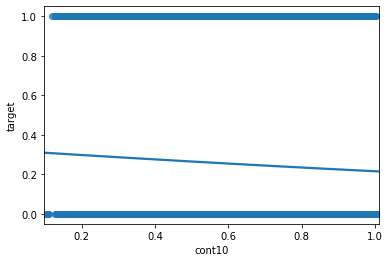

In [78]:
import seaborn as sns
p= df['cont10']
q= df['target']
sns.regplot(x=p, y=q, data=df, logistic=True, ci=None)

<AxesSubplot:xlabel='cont0', ylabel='target'>

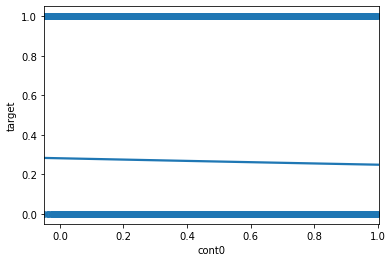

In [85]:
p= df['cont0']
q= df['target']


sns.regplot(x=p, y=q, data=df, logistic=True, ci=None)

